<a href="https://colab.research.google.com/github/NirmalGanesan/demo-repo/blob/main/Handwritten%20Digit%20Recoginization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


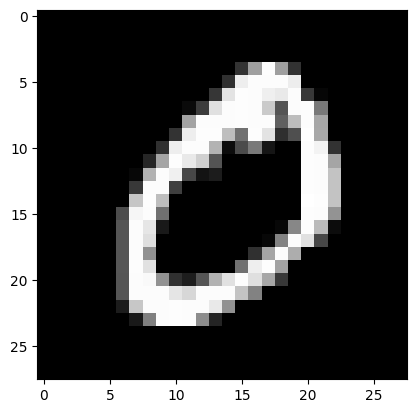

In [ ]:
plt.imshow(x_train[1], cmap='gray')
plt.show()

In [ ]:
print(f"Label: {y_train[0]}")


Label: 5


In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis= 1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape= (28, 28)))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(128, activation= 'relu'))
model.add(tf.keras.layers.Dense(10, activation= 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer= 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9829 - loss: 0.0529
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9876 - loss: 0.0397
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9901 - loss: 0.0305
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9925 - loss: 0.0232
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0200


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.1093


In [ ]:
predictions = model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


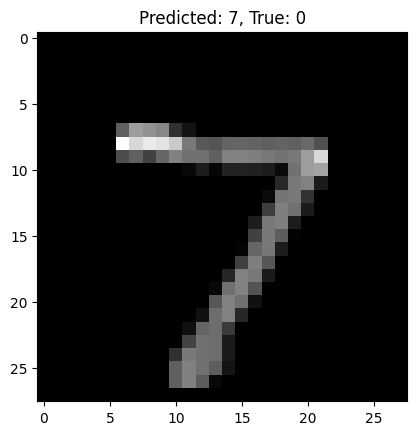

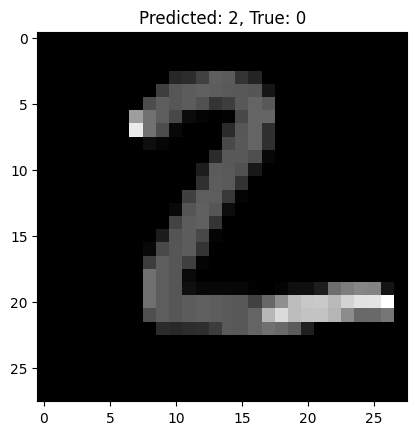

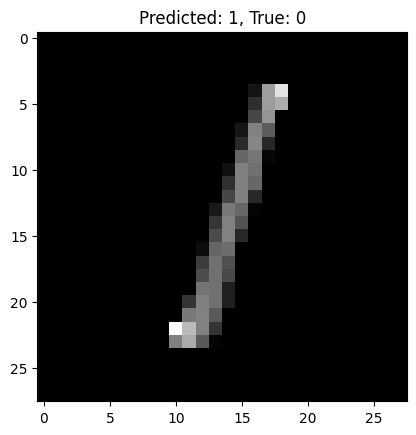

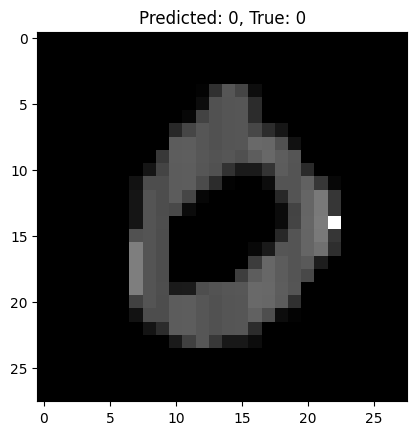

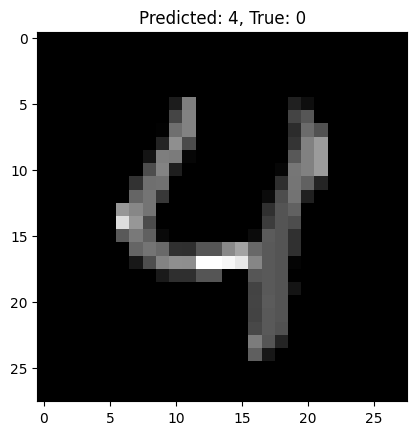

In [ ]:
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, True: {np.argmax(y_test[i])}")
    plt.show()

In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install gdown

In [ ]:
import gdown


In [ ]:
file_id = '1zUq7PRD0msSOSD91C6ACdeVzouQFjNpb'

In [ ]:
download_url = f'https://drive.google.com/uc?id={file_id}'

In [ ]:
output = '0_kKxxK1YXSyWMEBtS.png'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zUq7PRD0msSOSD91C6ACdeVzouQFjNpb
To: /content/0_kKxxK1YXSyWMEBtS.png
100%|██████████| 2.85k/2.85k [00:00<00:00, 1.45MB/s]


'0_kKxxK1YXSyWMEBtS.png'

In [ ]:

image = cv2.imread(output, cv2.IMREAD_GRAYSCALE)

In [ ]:
image = cv2.resize(image, (28, 28))
image = image / 255.0
image = np.reshape(image, (1, 28, 28, 1))

In [ ]:
predictions = model.predict(image)
predicted_digit = np.argmax(predictions)

print(f'The predicted digit is: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
The predicted digit is: 3
